In [98]:
import os
import pandas as pd 
import pathlib
import cv2   #pip install opencv-python
from PIL import  Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,load_model
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score


#### Dataset url --> https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification

In [71]:
current_dir = os.getcwd()

In [72]:
os.path.join(current_dir,'Data')

'c:\\Users\\Ranjit\\Desktop\\ranjit-ML-AI-expertise\\Deep Learning\\CNN\\Dog_cat\\Data'

In [73]:
print("Total No. of Cat Images :",len(os.listdir(os.path.join(current_dir,'Data','images','cats'))))

Total No. of Cat Images : 349


In [74]:
print("Total No. of Dog Images :",len(os.listdir(os.path.join(current_dir,'Data','images','dogs'))))

Total No. of Dog Images : 348


In [75]:
image_path = os.path.join(os.getcwd(),'Data','images')
image_path

'c:\\Users\\Ranjit\\Desktop\\ranjit-ML-AI-expertise\\Deep Learning\\CNN\\Dog_cat\\Data\\images'

In [76]:
os.listdir(image_path)

['cats', 'dogs']

In [77]:
path_dict = {'cats':[],'dogs':[]}
for dir in os.listdir(image_path):
    directory_path = os.path.join(image_path,dir)
    for images in os.listdir(directory_path):
        path_dict[dir].append(os.path.join(directory_path,images))

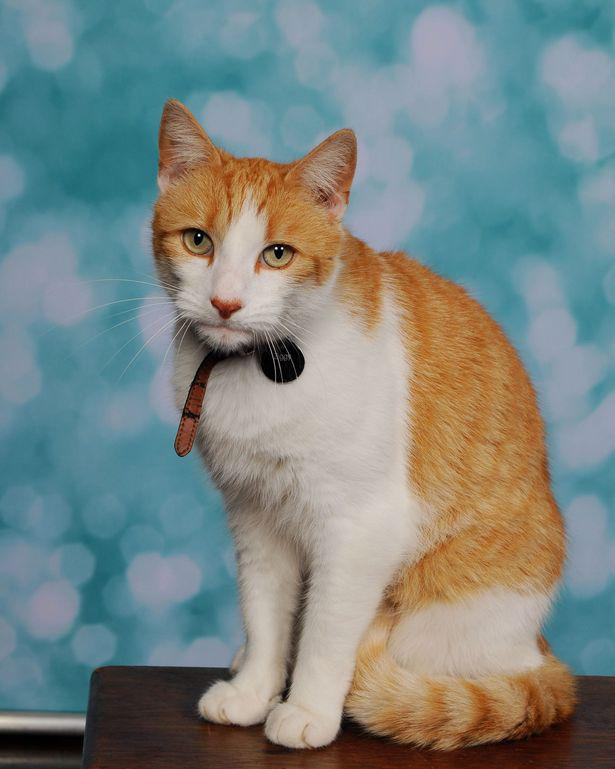

In [78]:
cat_image_demo = Image.open(path_dict['cats'][0])
cat_image_demo

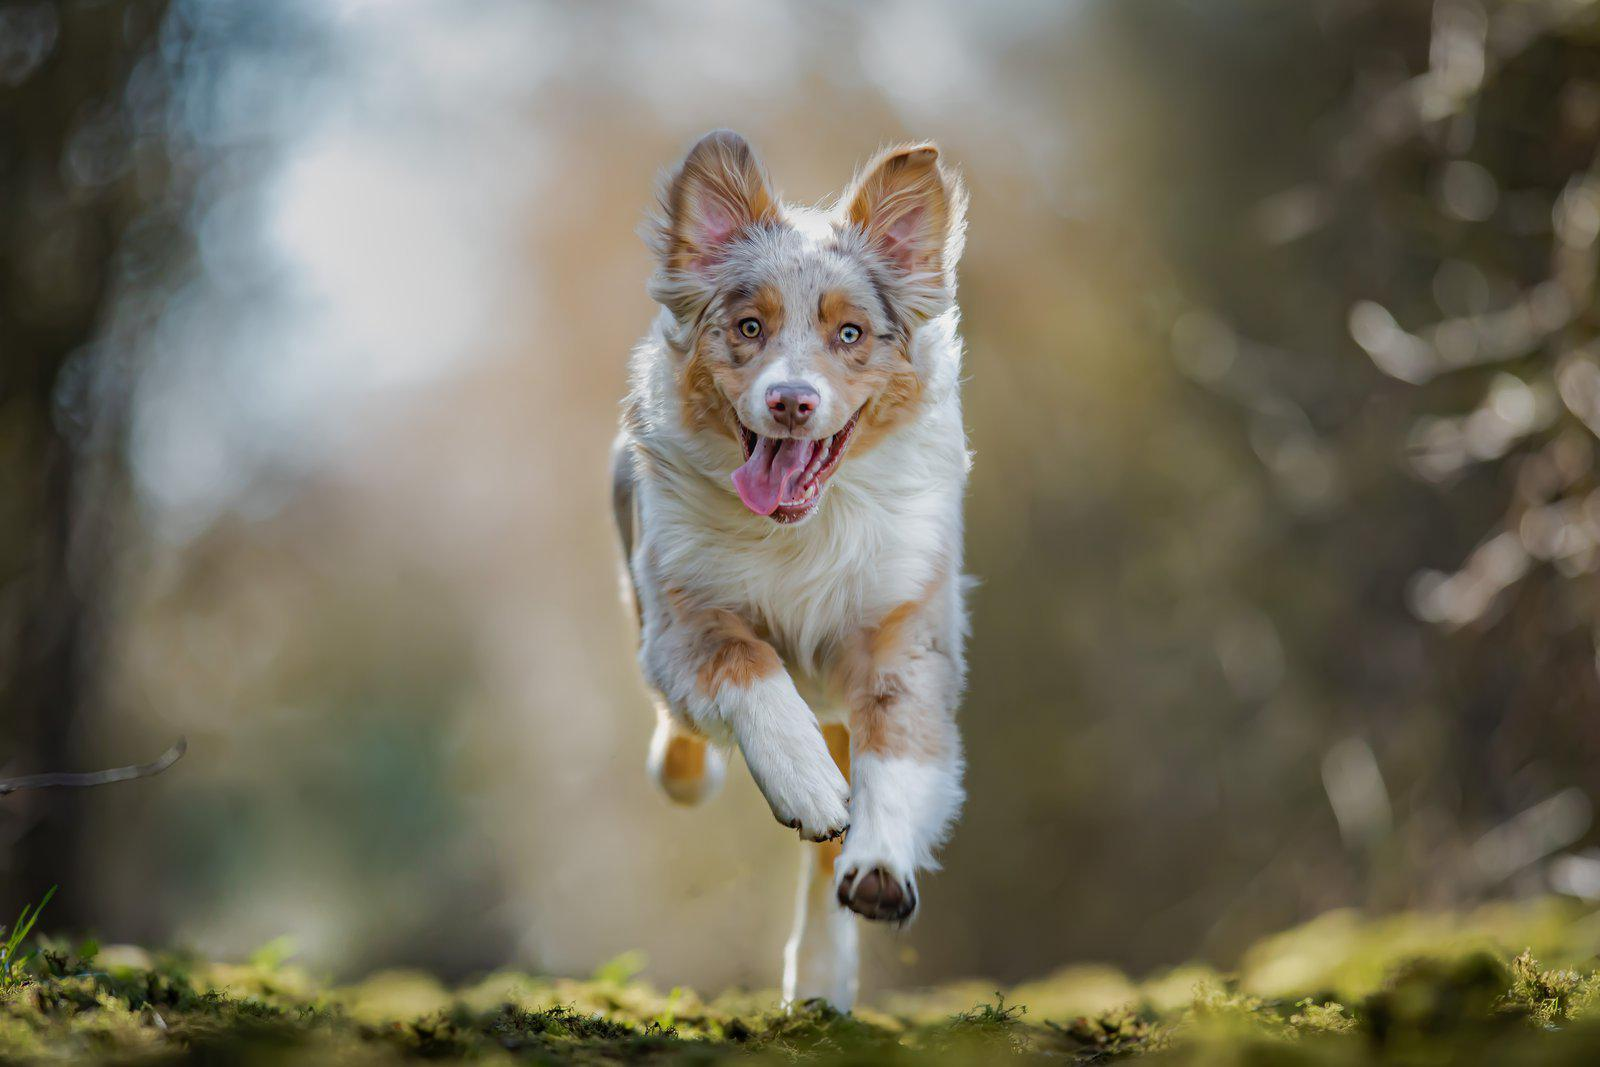

In [79]:
dog_image_demo = Image.open(path_dict['dogs'][0])
dog_image_demo

In [80]:
## Now we are Reading the Image as an array
img_arr_lst = []
labels = []
for key , valu in path_dict.items():
    for path in valu:
        img_arr = cv2.imread(path)
        resized_img_arr = cv2.resize(img_arr,(224,244))
        img_arr_lst.append(resized_img_arr)
        labels.append(key)

In [81]:
array_image = np.array(img_arr_lst)
labels = np.array(labels)
array_image.shape          ,    labels.shape  

((697, 244, 224, 3), (697,))

In [82]:
# label encoding
labels = np.array([1 if item=='dogs' else 0 for item in list(labels)])

In [83]:
# Train Test splitting the dataset
x_train , x_test , y_train , y_test = train_test_split(array_image,labels,test_size=0.2,random_state=42)

In [84]:
#Normalizing the pixel value in between 0 - 1 range
x_train = x_train/255
x_test = x_test/255
x_train.shape , y_train.shape

# If you want to Normalize in btw -1  to +1
# x_test = (x_test-127.5)/127.5


((557, 244, 224, 3), (557,))

In [85]:
# Define the CNN architecture
model = Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(244, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary for a detailed overview
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 242, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 121, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 119, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 59, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 57, 52, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 189696)           

In [97]:
history = model.fit(x_train,y_train,initial_epoch=2,epochs=10,batch_size=52,validation_data=(x_test,y_test))

Epoch 3/10
11/11 [==============================] - 40s 4s/step - loss: 0.6931 - accuracy: 0.5135 - val_loss: 0.6936 - val_accuracy: 0.4429
Epoch 4/10
11/11 [==============================] - 32s 3s/step - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6937 - val_accuracy: 0.4429
Epoch 5/10
11/11 [==============================] - 34s 3s/step - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6937 - val_accuracy: 0.4429
Epoch 6/10
11/11 [==============================] - 33s 3s/step - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6938 - val_accuracy: 0.4429
Epoch 7/10
11/11 [==============================] - 29s 3s/step - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6939 - val_accuracy: 0.4429
Epoch 8/10
11/11 [==============================] - 25s 2s/step - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6939 - val_accuracy: 0.4429
Epoch 9/10
11/11 [==============================] - 25s 2s/step - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6940 - val_accuracy: 0.4429
Epoch 10/10
11/11 [=

In [120]:
history = model.fit(x_train,y_train,initial_epoch=10,epochs=20,batch_size=52,validation_data=(x_test,y_test))


Epoch 11/20
11/11 [==============================] - 40s 4s/step - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6941 - val_accuracy: 0.4429
Epoch 12/20
11/11 [==============================] - 40s 4s/step - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6942 - val_accuracy: 0.4429
Epoch 13/20
11/11 [==============================] - 39s 4s/step - loss: 0.6929 - accuracy: 0.5135 - val_loss: 0.6942 - val_accuracy: 0.4429
Epoch 14/20
11/11 [==============================] - 36s 3s/step - loss: 0.6929 - accuracy: 0.5135 - val_loss: 0.6943 - val_accuracy: 0.4429
Epoch 15/20
11/11 [==============================] - 35s 3s/step - loss: 0.6929 - accuracy: 0.5135 - val_loss: 0.6944 - val_accuracy: 0.4429
Epoch 16/20
11/11 [==============================] - 35s 3s/step - loss: 0.6929 - accuracy: 0.5135 - val_loss: 0.6944 - val_accuracy: 0.4429
Epoch 17/20
11/11 [==============================] - 35s 3s/step - loss: 0.6929 - accuracy: 0.5135 - val_loss: 0.6945 - val_accuracy: 0.4429
Epoch 18/20
1

In [122]:
training_history_data = pd.DataFrame(history.history)
training_history_data

loss  accuracy  val_loss  val_accuracy
0  0.692969  0.513465  0.694131      0.442857
1  0.692957  0.513465  0.694170      0.442857
2  0.692950  0.513465  0.694229      0.442857
3  0.692949  0.513465  0.694316      0.442857
4  0.692929  0.513465  0.694362      0.442857
5  0.692928  0.513465  0.694444      0.442857
6  0.692916  0.513465  0.694499      0.442857
7  0.692908  0.513465  0.694540      0.442857
8  0.692908  0.513465  0.694615      0.442857
9  0.692892  0.513465  0.694653      0.442857

<Axes: >

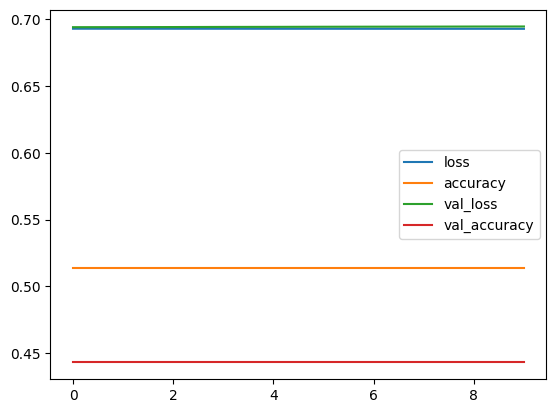

In [123]:
training_history_data.plot()

<Axes: >

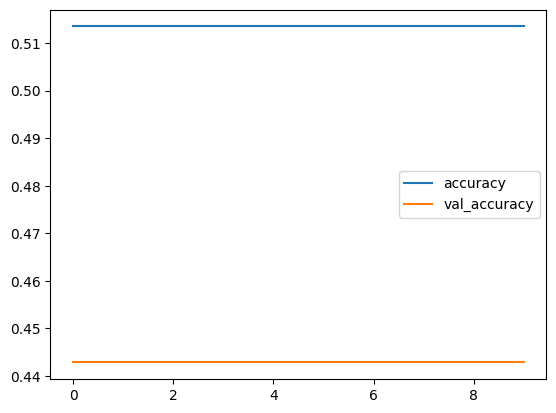

In [124]:
training_history_data[['accuracy','val_accuracy']].plot()
# Accuracy vs Validation Accuracy

<Axes: >

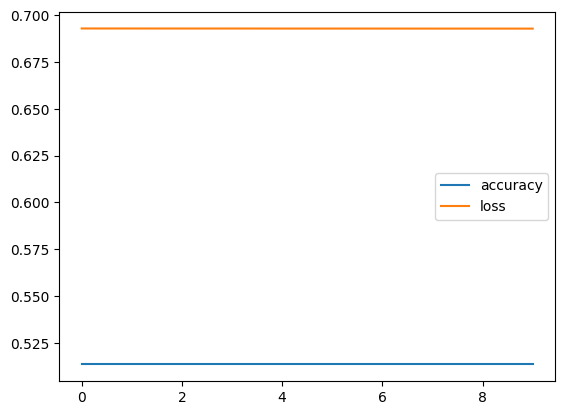

In [125]:
training_history_data[['accuracy','loss']].plot()
# training accuracy Vs  training Loss


<Axes: >

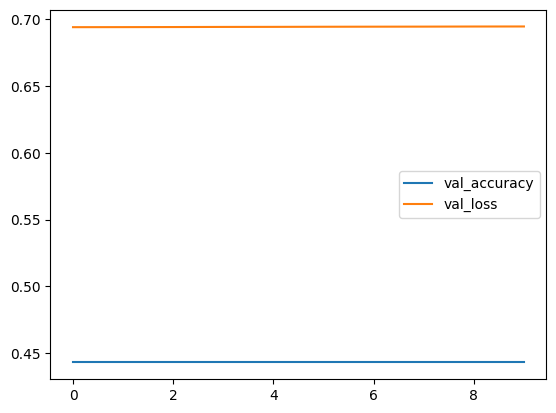

In [126]:
training_history_data[['val_accuracy','val_loss']].plot()


In [127]:
accuracy_on_training_data = model.evaluate(x_train,y_train)
accuracy_on_training_data

18/18 [==============================] - 6s 308ms/step - loss: 0.6929 - accuracy: 0.5135


[0.6928888559341431, 0.5134649872779846]

In [128]:
accuracy_on_testing_data = model.evaluate(x_test,y_test)
accuracy_on_testing_data

5/5 [==============================] - 1s 223ms/step - loss: 0.6947 - accuracy: 0.4429


[0.6946529150009155, 0.44285714626312256]

In [129]:
y_pred = model.predict(x_test)
# Get the prediction

5/5 [==============================] - 1s 239ms/step


In [130]:
predictions = (y_pred>0.5).astype(int).ravel()
# Get the original prediction from the probability

In [131]:
confusion_matrix(y_test,predictions)

array([[ 0, 78],
       [ 0, 62]], dtype=int64)

In [133]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.44      1.00      0.61        62

    accuracy                           0.44       140
   macro avg       0.22      0.50      0.31       140
weighted avg       0.20      0.44      0.27       140



c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

### HyperParameters Turning in CNN

In [ ]:
# code will be uploaded as soon as possible

### THANK YOU ü§ç‚ù£ü§ç